1. Determine the five most common journals and the total articles for each. 
2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('input\data_UTF-16LE.csv', encoding='UTF_16_LE')
print(raw_data.shape)
raw_data.head(10)

(2127, 5)


,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


### Exploratory Data Analysis and Cleaning

In [3]:
# Renaming "Cost" column
raw_data.rename({'COST (£) charged to Wellcome (inc VAT when charged)': 'Cost'}, axis=1, inplace=True)
raw_data.rename({'Journal title': 'Journal'}, axis=1, inplace=True)
raw_data.rename({'Article title': 'Article'}, axis=1, inplace=True)
raw_data.rename({'PMID/PMCID': 'PMID'}, axis=1, inplace=True)

# make changes to 'data' rather than raw_data
data = raw_data

# Removing the £ and $ from cost column
data['Cost'].replace(regex=True, inplace=True, to_replace=r'[£$]', value=r'')

# Converting string to float
#pd.to_numeric(data['Cost']).head(5)
data['Cost'] = data['Cost'].apply(lambda x: float(x))

# Another way of doing the same thing:
# data['cost'] = data['cost'].apply(lambda x: x.replace('£', '') if '£' in str(x) else x)
# data['cost'] = data['cost'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# data['cost'] = data['cost'].apply(lambda x: float(x))

In [4]:
# Check if there are any null values and in what columns
data.isnull().sum()

PMID         199
Publisher      0
Journal        1
Article        0
Cost           0
dtype: int64

In [13]:
data.drop(data[(data.Journal.isnull())].index)

data.isnull().sum()

PMID         187
Publisher      0
Journal        0
Article        0
Cost           0
dtype: int64

In [6]:
# Do results make sense?
data.describe()

,Cost
count,2127.000000
mean,24067.339972
std,146860.665559
min,0.000000
25%,1280.000000
50%,1884.010000
75%,2321.305000
max,999999.000000


Apparently there are articles costing them a million dollars.  Let's get rid of some of the excess outliars.

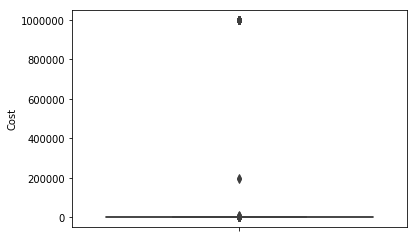

In [7]:
ax = sns.boxplot(y = 'Cost', data = data)

In [8]:
data.dropna(subset=['Cost'], inplace=True)
data.drop(data[(data.Cost > 4000)].index, inplace=True)
data.describe()


,Cost
count,2052.000000
mean,1791.104352
std,716.771584
min,0.000000
25%,1260.195000
50%,1834.770000
75%,2291.247500
max,3997.710000


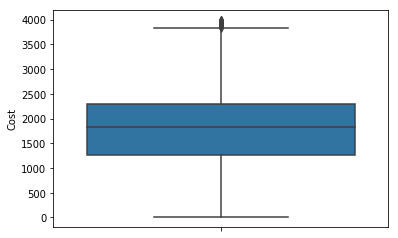

In [9]:
ax = sns.boxplot(y = 'Cost', data = data)

In [10]:
# Fixing the case of names
data['Publisher'] = data['Publisher'].apply(lambda x: str(x).capitalize())
data['Journal'] = data['Journal'].apply(lambda x: str(x).capitalize())
data['Article'] = data['Article'].apply(lambda x: str(x).capitalize())
data.head(5)

,PMID,Publisher,Journal,Article,Cost
0,NaN,Cup,Psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,Acs,Biomacromolecules,Structural characterization of a model gram-ne...,2381.04
2,23043264 PMC3506128,Acs,J med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,Acs,J med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,Acs,J org chem,Regioselective opening of myo-inositol orthoes...,685.88


#### Question 1. 5 most common journals and total articles for each

In [11]:
q1 = data['Journal'].value_counts().head(5)
q1

Plos one                           182
Journal of biological chemistry     52
Neuroimage                          29
Nucleic acids research              23
Plos pathogens                      22
Name: Journal, dtype: int64

#### Question 2: The mean, median, and standard deviation of the open-access cost per article

In [12]:
q2 = data.describe()
q2

,Cost
count,2052.000000
mean,1791.104352
std,716.771584
min,0.000000
25%,1260.195000
50%,1834.770000
75%,2291.247500
max,3997.710000


The mean, median, and standard deviation are 1791.11, 1834.77, and 716.77 respectively